In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#   display settings

In [5]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)

# Load Dataset

In [9]:
df = pd.read_csv("D:\downloads 2\Coca-Cola_stock_history.csv")  # Adjust the filename if needed
df.head()

<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
C:\Users\Sandipan Jana\AppData\Local\Temp\ipykernel_15300\839997848.py:1: SyntaxWarning: invalid escape sequence '\d'
  df = pd.read_csv("D:\downloads 2\Coca-Cola_stock_history.csv")  # Adjust the filename if needed


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,1962-01-02,0.05,0.05,0.05,0.05,806400,0.00,0
1,1962-01-03,0.05,0.05,0.05,0.05,1574400,0.00,0
2,1962-01-04,0.05,0.05,0.05,0.05,844800,0.00,0
3,1962-01-05,0.05,0.05,0.05,0.05,1420800,0.00,0
4,1962-01-08,0.05,0.05,0.05,0.05,2035200,0.00,0


# Basic Info and Data Types

In [10]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15311 entries, 0 to 15310
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          15311 non-null  object 
 1   Open          15311 non-null  float64
 2   High          15311 non-null  float64
 3   Low           15311 non-null  float64
 4   Close         15311 non-null  float64
 5   Volume        15311 non-null  int64  
 6   Dividends     15311 non-null  float64
 7   Stock Splits  15311 non-null  int64  
dtypes: float64(5), int64(2), object(1)
memory usage: 957.1+ KB


,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,15311.00,15311.00,15311.00,15311.00,15311.00,15311.00,15311.00
mean,11.81,11.91,11.72,11.82,9139213.47,0.00,0.00
std,15.03,15.13,14.92,15.03,7957947.37,0.02,0.05
min,0.04,0.04,0.03,0.04,76800.00,0.00,0.00
25%,0.24,0.24,0.24,0.24,2889600.00,0.00,0.00
50%,4.94,4.98,4.88,4.94,7708800.00,0.00,0.00
75%,17.38,17.61,17.17,17.42,13071300.00,0.00,0.00
max,66.04,66.24,64.78,65.26,124169000.00,0.44,3.00


# Check for null values

In [11]:
df.isnull().sum()


Date            0
Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64

#  Drop rows with missing values

In [12]:
df.dropna(inplace=True)

# Convert Date column to datetime and sort


In [15]:
print(df.columns)


Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Dividends',
       'Stock Splits'],
      dtype='object')


In [19]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce', utc=True)
df = df.sort_values('Date')
df.reset_index(drop=True, inplace=True)


# Statistical Summary

In [20]:

df.describe()


,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,15311.00,15311.00,15311.00,15311.00,15311.00,15311.00,15311.00
mean,11.81,11.91,11.72,11.82,9139213.47,0.00,0.00
std,15.03,15.13,14.92,15.03,7957947.37,0.02,0.05
min,0.04,0.04,0.03,0.04,76800.00,0.00,0.00
25%,0.24,0.24,0.24,0.24,2889600.00,0.00,0.00
50%,4.94,4.98,4.88,4.94,7708800.00,0.00,0.00
75%,17.38,17.61,17.17,17.42,13071300.00,0.00,0.00
max,66.04,66.24,64.78,65.26,124169000.00,0.44,3.00


#  Data Visualization: Close Price Over Time

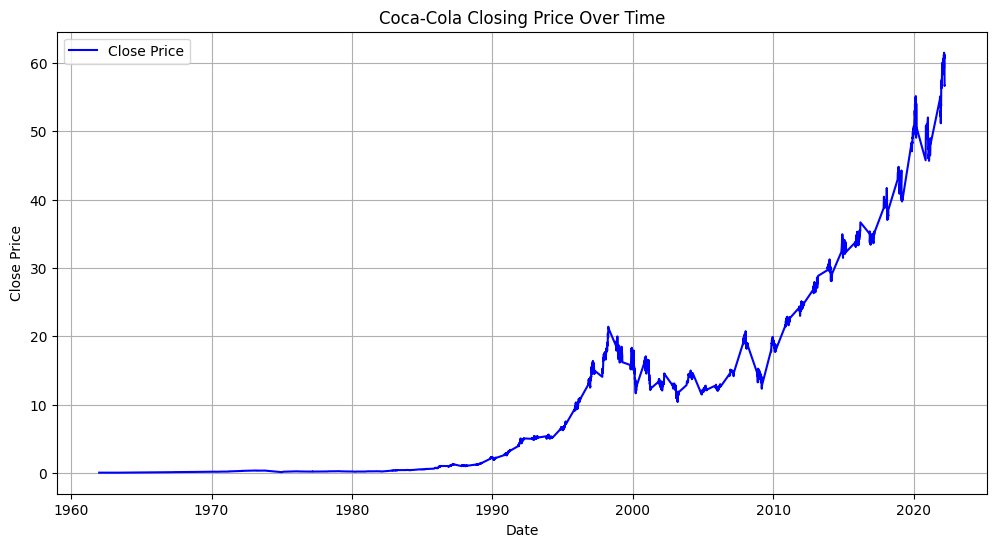

In [22]:

df = df.dropna(subset=['Date'])


df['Date'] = df['Date'].dt.tz_localize(None)


plt.figure(figsize=(12,6))
plt.plot(df['Date'], df['Close'], label='Close Price', color='blue')
plt.title('Coca-Cola Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.grid(True)
plt.legend()
plt.show()


# Moving Averages

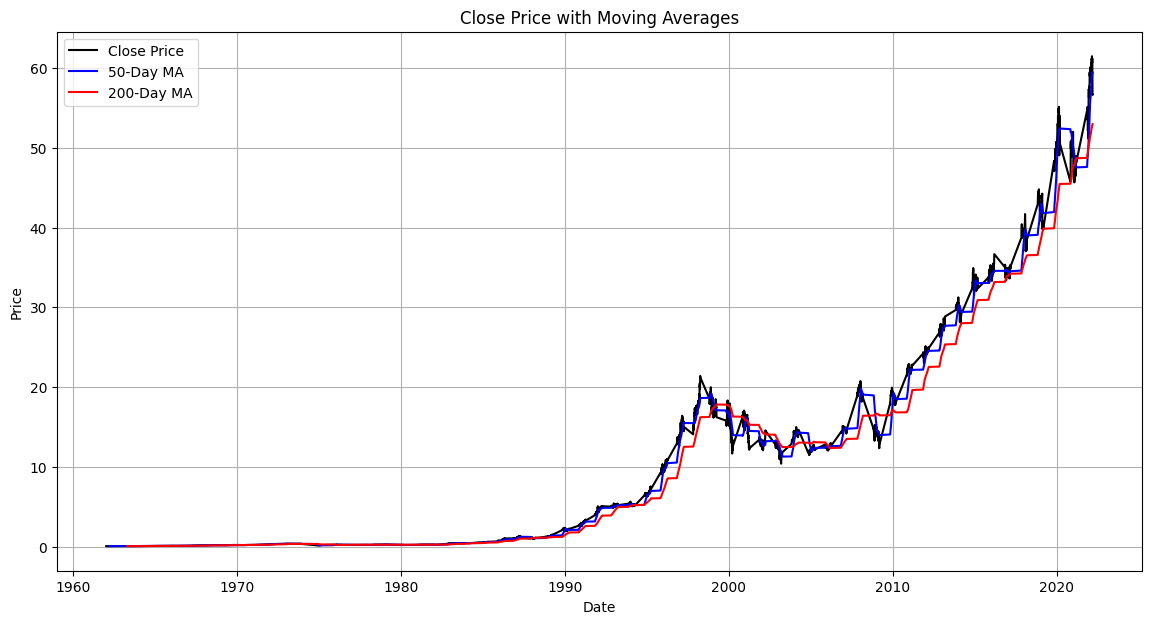

In [23]:

df['MA50'] = df['Close'].rolling(window=50).mean()
df['MA200'] = df['Close'].rolling(window=200).mean()

plt.figure(figsize=(14,7))
plt.plot(df['Date'], df['Close'], label='Close Price', color='black')
plt.plot(df['Date'], df['MA50'], label='50-Day MA', color='blue')
plt.plot(df['Date'], df['MA200'], label='200-Day MA', color='red')
plt.title('Close Price with Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()


# Daily Returns

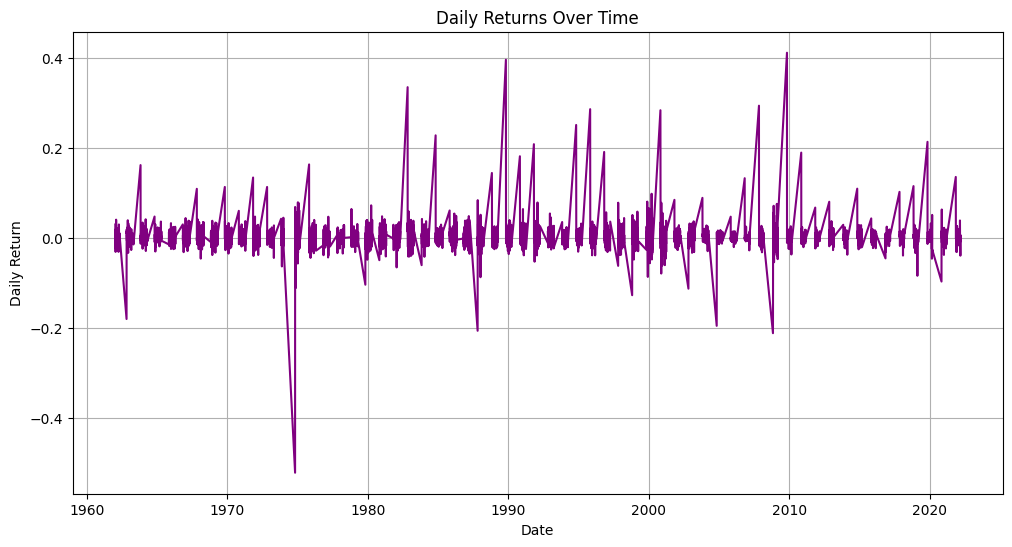

In [24]:
df['Daily_Return'] = df['Close'].pct_change()

plt.figure(figsize=(12,6))
plt.plot(df['Date'], df['Daily_Return'], color='purple')
plt.title('Daily Returns Over Time')
plt.xlabel('Date')
plt.ylabel('Daily Return')
plt.grid(True)
plt.show()

# Volume Traded Over Time


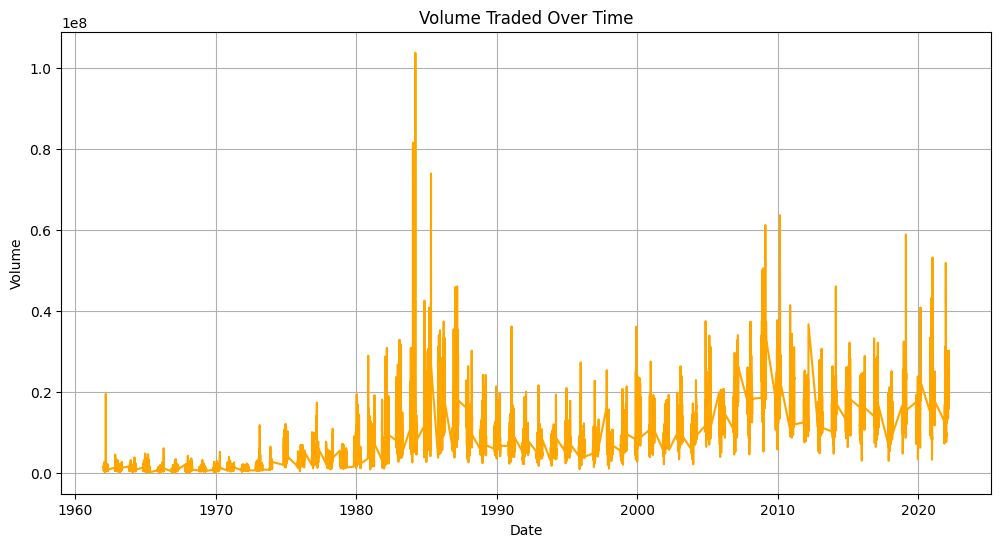

In [25]:
plt.figure(figsize=(12,6))
plt.plot(df['Date'], df['Volume'], color='orange')
plt.title('Volume Traded Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.grid(True)
plt.show()


# Correlation Heatmap

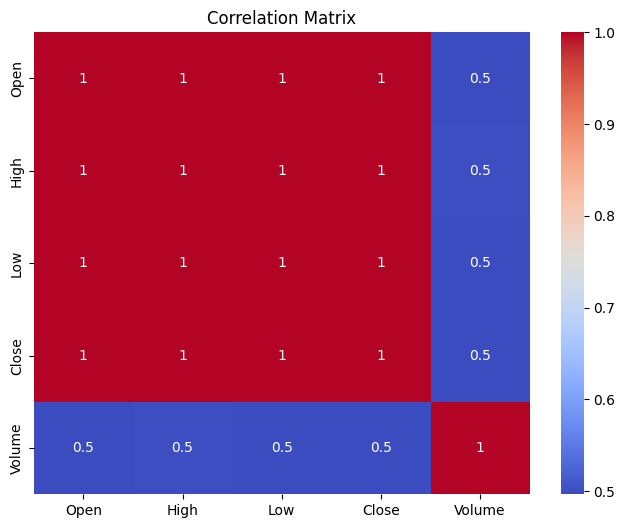

In [26]:
plt.figure(figsize=(8,6))
sns.heatmap(df[['Open', 'High', 'Low', 'Close', 'Volume']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Histogram of Closing Prices

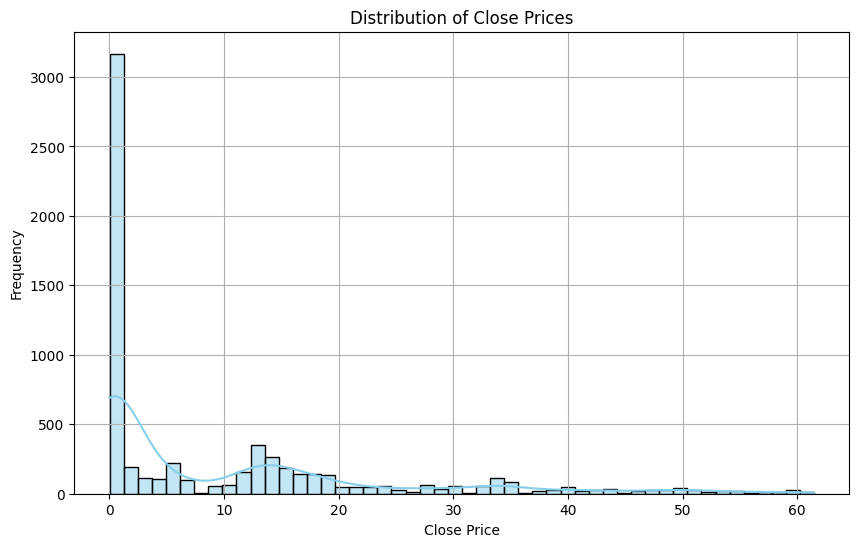

In [27]:
plt.figure(figsize=(10,6))
sns.histplot(df['Close'], bins=50, kde=True, color='skyblue')
plt.title('Distribution of Close Prices')
plt.xlabel('Close Price')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Boxplot for Outlier Detection

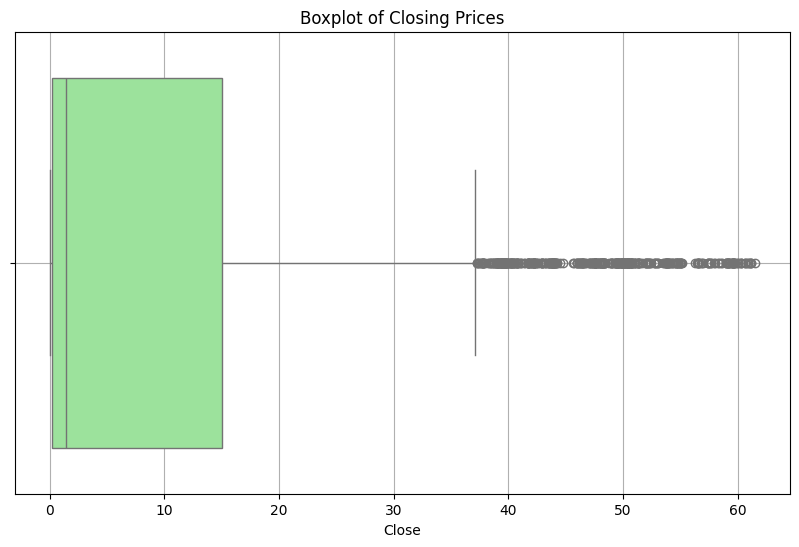

In [28]:
plt.figure(figsize=(10,6))
sns.boxplot(x=df['Close'], color='lightgreen')
plt.title('Boxplot of Closing Prices')
plt.grid(True)
plt.show()

# Final Check of DataFrame

In [29]:
df.tail()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,MA50,MA200,Daily_Return
6466,2022-03-07,60.66,60.71,59.39,59.75,29151400,0.00,0,59.46,52.88,-0.02
6467,2022-03-08,60.11,60.20,57.31,57.38,30242100,0.00,0,59.47,52.90,-0.04
6468,2022-03-09,58.51,58.53,57.38,57.67,23022700,0.00,0,59.47,52.93,0.01
6469,2022-03-10,57.20,57.38,56.24,56.62,20887300,0.00,0,59.45,52.94,-0.02
6470,2022-03-11,56.69,57.56,56.60,56.65,19855600,0.00,0,59.43,52.96,0.00


# ml section 

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


In [31]:

df.dropna(inplace=True)


X = df[['Open', 'High', 'Low', 'Volume']]
y = df['Close']


In [32]:
# split the data

In [33]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)


In [34]:
# train the model


In [35]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [36]:
#Make Predictions


In [37]:
y_pred = model.predict(X_test)


In [38]:
#Evaluate the Model

In [39]:
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f'R² Score: {r2:.4f}')
print(f'RMSE: {rmse:.2f}')


R² Score: -0.9680
RMSE: 17.31


In [40]:
#Visualize Actual vs Predicted

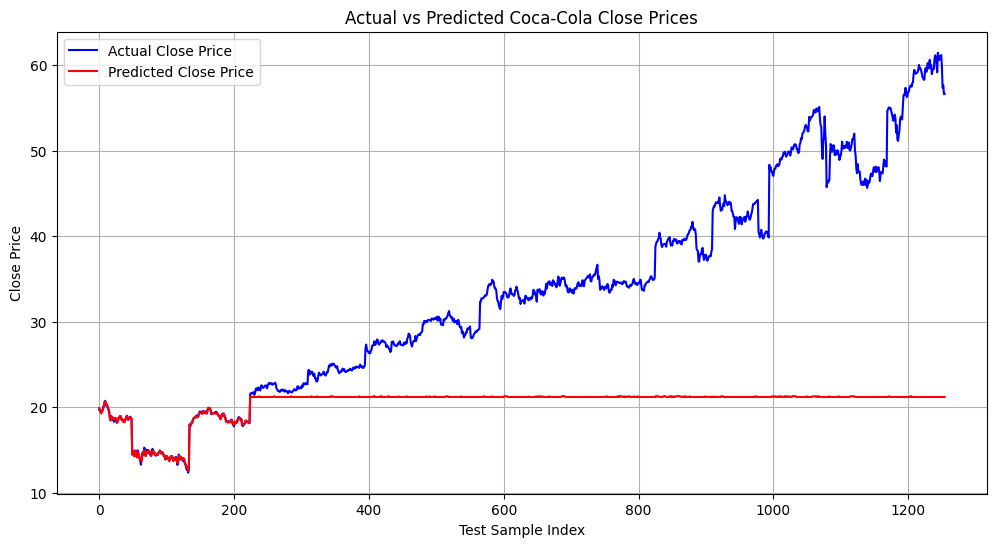

In [41]:
plt.figure(figsize=(12,6))
plt.plot(y_test.values, label='Actual Close Price', color='blue')
plt.plot(y_pred, label='Predicted Close Price', color='red')
plt.title('Actual vs Predicted Coca-Cola Close Prices')
plt.xlabel('Test Sample Index')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.show()
